In [1]:
import pandas as pd
import os

train_df = pd.read_csv('train.csv')

In [2]:
train_df

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...


In [4]:
train_df.loc[train_df[['id', 'discourse_type', 'predictionstring']].duplicated(keep=False)][
    [
        "id",
        "discourse_id",
        "discourse_start",
        "discourse_end",
        "discourse_text",
        "discourse_type",
        "discourse_type_num",
        "predictionstring",
    ]
]

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
30713,92C09304882D,1.615603e+12,117.0,124.0,"family,",Claim,Claim 2,22
30714,92C09304882D,1.615603e+12,124.0,130.0,"money,",Claim,Claim 3,22
143325,15F434699355,1.617986e+12,201.0,210.0,knowledge,Claim,Claim 2,31
143326,15F434699355,1.617986e+12,215.0,228.0,environment.,Claim,Claim 3,31


1. Add original text to csv

In [5]:
file_name_list = train_df['id'].unique()
file_num_dict=dict(train_df['id'].value_counts())
text_list=[]
for file_name in file_name_list:
    file_path = os.path.join('./train', file_name+'.txt')
    with open(file_path, 'r', encoding='utf-8') as f:
        line = f.readlines()
    line = ''.join(line)
    repeat_num = file_num_dict[file_name]
    for _ in range(repeat_num):
        text_list.append(line)
train_df['original_text'] = pd.Series(text_list)

In [6]:
train_df.head(10)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,original_text
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,Phones\n\nModern humans today are always on th...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,Phones\n\nModern humans today are always on th...
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,Phones\n\nModern humans today are always on th...
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,Phones\n\nModern humans today are always on th...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,Phones\n\nModern humans today are always on th...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...,Phones\n\nModern humans today are always on th...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...,Phones\n\nModern humans today are always on th...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...,Phones\n\nModern humans today are always on th...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...,Phones\n\nModern humans today are always on th...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...,Phones\n\nModern humans today are always on th...


2. Check original text format

In [21]:
train_df['original_text'][0]

"Phones\n\nModern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.\n\nWhen people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.\n\nDriving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to reme

- \n\n을 통해 개행하고 있음. 그러나 discourse type이 이 \n\n을 기준으로 항상 바뀌는 것은 아님  
- 또한 마침표의 위치가 일관적이지 않은 것도 확인할 수 있다 (Modern humans today are always on their phone. vs They are always on their phone more than 5 hours a day no stop .) 
- text의 마무리에 공백이 길게 남아있음을 확인할 수 있음.

In [6]:
original_text_list = train_df['original_text'].unique()
for text in original_text_list:
    if '\n\n' not in text:
        x = text
        break
x

'I think driving while using cell phones should be banned because of the many car accidents they are causing, it is causing ones insurance to rise, and it is causing concerns to people health issues. Banning cell phone while driving will keep a safe distance from accidents. The question is people more concerned more with their conveniences more than they are with the their safety or safety of others. It is a habit that spreads like STDs. In the long run, it is deadly as well Cell phones are the electronic device. Studies have proved that drivers who use cell phones while driving are more prone to cause accidents. Driving while using a cell phone to drunk driving, in both cases, a person does not have enough focus and mentally capacity to carry out a potentially dangerous activity like driving. If you have this habit, do not forget about it also. Banning cell phone while driving will keep a safe distance from accidents. One cannot focus fully on the road and the other vehicles, if one k

- 다음과 같이 \n\n이 없는 문서도 존재함. 
- 만약 \n\n 앞의 텍스트가 타이틀의 형식이라면 \n\n을 일방적으로 없앨 경우 다음 문장과의 구분이 어려워지는 문제가 발생하므로 섬세한 전처리 방법을 고안할 필요가 있음
* 주의! : text를 그냥 출력하는 것이 원본 형태이며 csv의 인덱스 정보와 매칭 가능한 형태임. print를 통해 확인할 경우 \n과 같은 특수 기호들이 인코딩되어 처리되기 때문에 원본과 다른 형태가 됨!

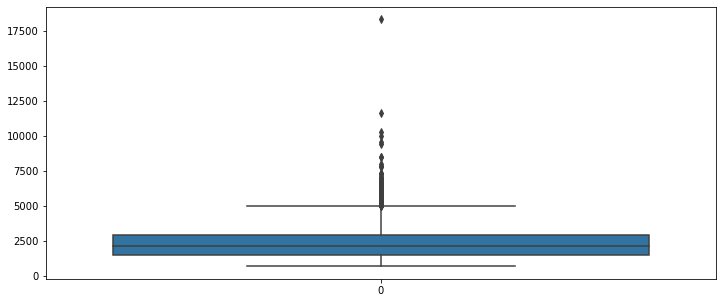

18322
691


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
x = [len(text) for text in original_text_list]
x.sort()
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.boxplot(data=x, ax=ax)
plt.show()
print(max(x))
print(min(x))

3. null & error data validation

In [7]:
file_list = os.listdir('./train')
print(len(file_list))
print(len(train_df['id'].unique()))

15594
15594


train 폴더 내의 모든 텍스트에 대해 결측치 없이 레이블링이 되어있는 것 역시 확인할 수 있음.

4. how many discourse instance in each text?

In [8]:
train_df['id'].value_counts()

71259B3EA87F    26
149E8C278863    26
7C9C2DF37B67    25
A02E1D0BEACF    25
EDC567D40996    24
                ..
924F1F4490F9     1
0AB5C0C20670     1
3BF8370D18A6     1
939718B6780D     1
3D99FC2386BD     1
Name: id, Length: 15594, dtype: int64

최대 26개부터 최소 1개의 discourse type만 존재하는 텍스트까지 다양하게 존재함.

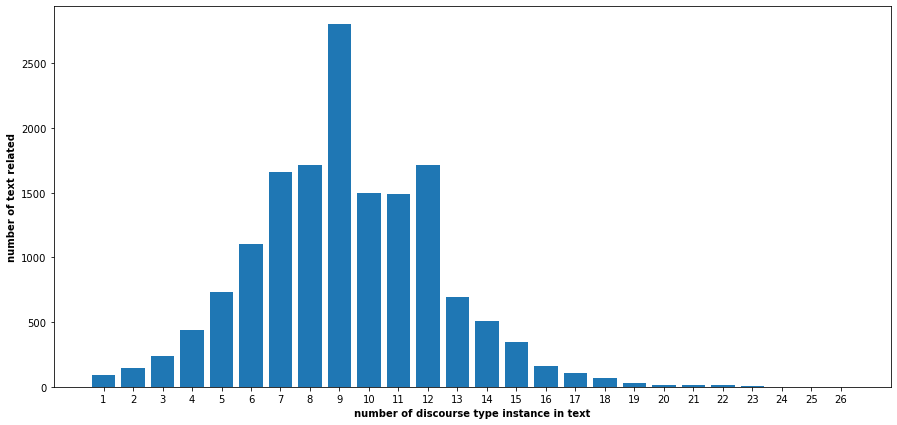

In [9]:
import matplotlib.pyplot as plt
file2num_dict = dict(train_df['id'].value_counts())
num2file_dict = {}
for key, value in file2num_dict.items():
    if value not in num2file_dict:
        num2file_dict[value]=[key]
    else:
        num2file_dict[value].append(key)

fig, ax = plt.subplots(1,1,figsize=(15,7))
x = list(num2file_dict.keys())
y = [len(value) for key, value in num2file_dict.items()]
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xlabel('number of discourse type instance in text', fontweight='bold')
ax.set_ylabel('number of text related', fontweight='bold')
plt.show()

분포는 비교적 정규분포(?)와 비슷해보이기도 한다. 텍스트에 딱 한개만 discourse type이 있는 극단적인 친구들은 대체 어떤 친구들인지 좀 더 자세히 알아보자

In [10]:
only_one = num2file_dict[1]
print("texts that have only one discourse type : ", len(only_one))

texts that have only one discourse type :  92


In [11]:
x = train_df[train_df['id']==only_one[0]]
x

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,original_text
8065,547C43CF3291,1.622488e+12,0.0,1634.0,to bein with the passage mainly states or real...,Evidence,Evidence 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...,to bein with the passage mainly states or real...


In [12]:
print(len(x.iloc[0]['original_text']))
print(len(x.iloc[0]['discourse_text']))

1634
1634


우선 샘플 하나 확인했을때는 텍스트 전체가 한 discourse type에 해당하네요? 아닌 경우도 있는지 한번 확인해봐야할 것 같아요

In [13]:
for idx in range(len(only_one)):
    x = train_df[train_df['id']==only_one[idx]]
    if x.iloc[0]['original_text']!=x.iloc[0]['discourse_text']:
        print(len(x.iloc[0]['original_text']), len(x.iloc[0]['discourse_text']))

2729 2714
2200 2197
2469 2083
1953 1853
1859 1790
1330 1265
3048 3040
1360 1331
1267 1266
1183 927
1612 1526
930 928
2010 1064
1970 1945
1981 1911
11641 1766
1712 1700
966 955
1031 962
3009 1424
1846 1794
1128 1059
1433 1039
1136 1100
2351 2335
1321 1296
1254 1249


역시나 전체 텍스트의 일부분(사실 대부분이긴 한데)이 discourse type 딱 하나인 데이터들이 조금 있네요! 테스트 데이터에도 이런 데이터가 존재할 수도 있기 때문에 전처리과정에서 이 부분도 진지하게 고민해야할 것 같아요! \
또 텍스트 전반적으로 마무리에 공백이 들어가 있는 경우가 있는데 이게 discourse text에는 안들어가 있어서 길이 비교할 때 다르다고 나올수도 있네요!

5. Class distribution

In [14]:
train_df['discourse_type'].value_counts()

Claim                   50208
Evidence                45702
Position                15419
Concluding Statement    13505
Lead                     9305
Counterclaim             5817
Rebuttal                 4337
Name: discourse_type, dtype: int64

아무래도 글 구조의 특성상 Class imbalance는 심할 수 밖에 없나봐요! 데이터도 부족한데 imbalance라니... 마침 외부데이터도 사용이 가능하지만 주어진 데이터에서의 data augmentation을 적극적으로 고려해야할 것 같아요!

In [26]:
file_name_list = train_df['id'].unique()
class_list = ['Claim', 'Evidence', 'Position', 'Concluding Statement', 'Lead', 'Counterclaim', 'Rebuttal']
class_minmax_dict = {item:[100,-100] for item in class_list}
for file_name in file_name_list:
    temp = train_df[train_df['id']==file_name]
    x = dict(temp['discourse_type'].value_counts())
    for item in class_list:
        if item not in x:
            class_minmax_dict[item][0]=0
            continue
        num = x[item]
        if class_minmax_dict[item][0]>num:
            class_minmax_dict[item][0]=num
        elif class_minmax_dict[item][1]<num:
            class_minmax_dict[item][1]=num


In [27]:
class_minmax_dict

{'Claim': [0, 12],
 'Evidence': [0, 12],
 'Position': [0, 2],
 'Concluding Statement': [0, 4],
 'Lead': [0, 2],
 'Counterclaim': [0, 6],
 'Rebuttal': [0, 6]}

각 텍스트에 discourse type이 몇개까지 있을 수 있는지 확인해봤는데 0개부터 최대 12개까지 다양하네요! Lead의 특성상 딱 한번만 등장할 거라고 생각했는데 아닌거 보니 병렬적인 topic이 담긴 텍스트도 있나봐요!

글의 구성성분이 클래스인 task 특성상 등장 순서가 문제 해결에 중요한 힌트가 될 것 같아요! 대신 중간에 분류가 되지 않는 텍스트가 껴있는 경우도 분리해서 생각하는 걸로 하죠!

In [52]:
file_name_list = train_df['id'].unique()
class_list = ['Claim', 'Evidence', 'Position', 'Concluding Statement', 'Lead', 'Counterclaim', 'Rebuttal']
class_next_dict = {item:{item2:0 for item2 in class_list} for item in class_list}
## 분류되지 않는 discourse type을 Others라 명명
for item in class_list:
    class_next_dict[item]['Others']=0
for file_name in file_name_list:
    temp = train_df[train_df['id']==file_name]
    idx_list = temp.index
    idx_list = [i for i in range(len(idx_list))]
    for idx in range(len(idx_list)):
        ##가장 마지막 discourse가 아닌경우
        if idx+1 in idx_list:
            ##바로 이어서 다음 discourse가 나오는 경우
            if temp.iloc[idx]['discourse_end']+1==temp.iloc[idx+1]['discourse_start']:
                class_next_dict[temp.iloc[idx]['discourse_type']][temp.iloc[idx+1]['discourse_type']]+=1
            else:
                class_next_dict[temp.iloc[idx]['discourse_type']]['Others']+=1


In [72]:
class_next_dict

{'Claim': {'Claim': 8631,
  'Evidence': 20682,
  'Position': 343,
  'Concluding Statement': 839,
  'Lead': 0,
  'Counterclaim': 858,
  'Rebuttal': 2,
  'Others': 18568},
 'Evidence': {'Claim': 15868,
  'Evidence': 3944,
  'Position': 680,
  'Concluding Statement': 8189,
  'Lead': 3,
  'Counterclaim': 2916,
  'Rebuttal': 383,
  'Others': 12110},
 'Position': {'Claim': 5529,
  'Evidence': 2106,
  'Position': 1,
  'Concluding Statement': 372,
  'Lead': 3,
  'Counterclaim': 260,
  'Rebuttal': 2,
  'Others': 6625},
 'Concluding Statement': {'Claim': 50,
  'Evidence': 23,
  'Position': 186,
  'Concluding Statement': 3,
  'Lead': 0,
  'Counterclaim': 78,
  'Rebuttal': 0,
  'Others': 172},
 'Lead': {'Claim': 690,
  'Evidence': 383,
  'Position': 4997,
  'Concluding Statement': 0,
  'Lead': 1,
  'Counterclaim': 125,
  'Rebuttal': 1,
  'Others': 3105},
 'Counterclaim': {'Claim': 181,
  'Evidence': 945,
  'Position': 55,
  'Concluding Statement': 139,
  'Lead': 0,
  'Counterclaim': 51,
  'Rebutta

Lead 뒤에는 주로 Position이, Position 뒤에는 주로 Claim이, Claim 뒤에는 주로 Evidence가, Evidence 뒤에는 Claim이 와서 두번째 주장을 할수도 있고 Concluding Statement가 와서 마무리를 할수도 있고, Evidence가 와서 두번째 증거를 낼 수도 있네요! 혹은 Counterclaim으로 반론을 제기할 수도 있네요! \
Counterclaim 뒤에는 주로 Rebuttal이 와서 이를 반박하고, Rebuttal 뒤에는 Evidence가 오나봐요! \
하지만 others 숫자가 적지 않은 걸 봐서 문장 단위로 나눠서 분류하면 Others가 많이 나올것 같아요!

6. Prediction string rule 확인

In [87]:
print(train_df['predictionstring'][0])
print(train_df['discourse_text'][0])
print(train_df['discourse_start'][0], train_df['discourse_end'][0])
print(train_df['original_text'][0][8:229])
train_df['original_text'][0]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
Modern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving.
8.0 229.0
Modern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving.


"Phones\n\nModern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.\n\nWhen people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.\n\nDriving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to reme

\n같은 개행기호들은 제외한채 단어만 카운트 하나봐요! 또한 이 텍스트의 타이틀로 'Phone'이 적혀있었는데 이것도 한 단어로 처리하네요! 

In [88]:
len(train_df['discourse_text'][0].split())

44

단어는 확실히 공백 기준으로 세는걸 확인할 수 있어요! tokenize가 끝나고 모델의 output token representation들을 받은 다음에 어느 부분이 어디에 속하는지 예측할 때 단어 기준으로 출력해줘야되는걸 생각하면 후처리 함수를 따로 고안해야할 것 같아요!

7. discourse text의 perfect sentence 여부

In [90]:
text_list = []
for text in train_df['discourse_text']:
    if '\n' in text:
        text_list.append(text)

In [92]:
text_list[0:10]

["Sometimes on the news there is either an accident or a suicide. It might involve someone not looking where they're going or tweet that someone sent. It either injury or death. If a mysterious number says I'm going to kill you and they know where you live but you don't know the person's contact\n\n,It makes you puzzled and make you start to freak out. Which can end up really badly. ",
 'According to an article by the Edgar Snyder Firm, 21% of teens that were part of a fatal car accident was due to phones. According to the same article, 35% know the risk but continue using their phones while on the road. This shows that its beyond dangerous and irresponsible of drivers not to be fully aware of their surroundings while driving. Drivers should be able to concentrate without any distractions, because it could be fatal.\n\nAccording to another article, "Distracted Driving" by the NHTSA, there has already been about 3,000 phone related car accident deaths since 2017. The article states that

\n만 확인했는데도 앞에 공백이 있거나 등등 정제되지 않은 텍스트들이 많네요! 문장들로 구성된건 확실한데 곳곳에 공백이나 개행기호등이 껴있네요! 전처리에서 고민해봐야할 부분중 하나겠군요! 원본 텍스트에서 인덱싱 해도 같은 결과인지 확인하는 절차가 필요할 것같아요

In [124]:
text_difference=[]
char_difference=[]
text_length_difference=[]
for i, (org_text, dis_text) in enumerate(zip(train_df['original_text'], train_df['discourse_text'])):
    start = int(train_df['discourse_start'][i])
    end = int(train_df['discourse_end'][i])
    if org_text[start:end]!=dis_text[:]:
        if len(org_text[start:end])!=len(dis_text[:]):
            print("length miss")
            text_length_difference.append((org_text[start:end], dis_text[:]))
        else:
            for j in range(len(dis_text)):
                if org_text[start:end][j]!=dis_text[j]:
                    char_difference.append((org_text[start:end][j], dis_text[j]))
        text_difference.append(org_text[start:end-1])
        text_difference.append(dis_text[:-1])

length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss
length miss


In [125]:
char_difference

[('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 (',', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 (',', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 (',', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),
 ('.', ' '),
 ('\n', ' '),

In [126]:
text_length_difference

[("erall, individuals should not use cell phones while driving.\n\nThey cause distraction and lack of focus.\n\nMany lives could be saved if people weren't careful about their cell phone usage.   ",
  "Overall, individuals should not use cell phones while driving.\n\nThey cause distraction and lack of focus.\n\nMany lives could be saved if people weren't careful about their cell phone usage.   "),
 ("This whole thing is point less how they have us in here for two days im missing my education. We could have finished this in one day and had the rest of the week to get back on the track of learning. I've missed both days of weight lifting, algebra, and my world history that i do not want to fail again! If their are any people actually gonna sit down and take the time to read this then\n\nDO NOT DO THIS NEXT YEAR\n\n.\n\nThey are giving us cold lunches. ham and cheese and an apple, I am 16\n\nyears old and my body needs proper food. I wouldnt be complaining if they served actual breakfast.

약간 레이블링을 친절하지 못하게 해줬나봐요 ^^ 주어진 표 상의 인덱스 정보로 원본 텍스트를 슬라이싱 한것과 discourse_text를 비교하면 끝부분에서 차이가 발생하네요!(물론 전부는 아니지만 절반 정도 이런것 같아요 ㅠㅠ) \n나 공백에서 차이가 발생하는 줄알았는데 은근 문자가 끼는 경우도 종종 발생하네요 ㅠㅠ 이럴 경우 보통 discourse_text를 신뢰해야겠다는 생각이 드네요 ㅜㅜ 인덱스를 조금 수정해야할 필요가 있어보여요! 길이차이가 있는 것도 있는데 확인해보니 discourse_text의 정확도가 훨씬 높네요! 데이터를 전반적으로 손봐야할 필요가 있어보이네요!